# Medical data visualizer
## The idea of this project is to analyze the correlation between different diseases, in a medical examination Data Frame. The data represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## We add the 'overweight' column, where we set values 0 or 1, if the patient is not overweight (0) or if it is overweight (1). 

In [4]:
BMI = (df['weight']/(df['height']/100) ** 2)

df.loc[BMI <= 25, 'overweight'] = 0 
df.loc[BMI > 25, 'overweight'] = 1 

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0


## We also normalize the values of Cholesterol and Glucosa.

In [5]:
df.loc[df['cholesterol']==1, 'cholesterol'] = 0 
df.loc[df['cholesterol']>1, 'cholesterol'] = 1 
df.loc[df['gluc']==1, 'gluc'] = 0 
df.loc[df['gluc']>1, 'gluc'] = 1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


## Now we will prepare the data frame in a long format, to plot by the different variables (diseases).


In [6]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

## The count plot by different diseases for two different cardio values is the following:

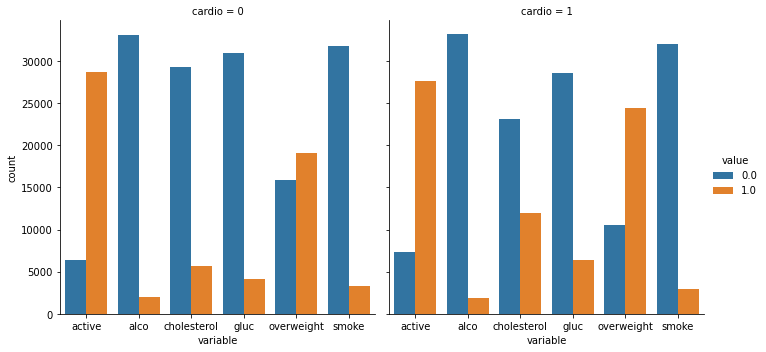

In [12]:
fig= sns.catplot(x='variable',col='cardio',hue='value',kind='count',data=df_cat)

In [13]:
fig.savefig('catplot.png')

In [8]:
# Analysis : We see that the most of the diseases are strongly correlated with 'heart disease' (cardio). 
#Where Cholesterol and overweight the most dramatic cases. Now we will filter wrong data, especially those 
#cases where the 'high value of blood pressure' is lower than the 'low value of blood pressure'. 
#We also filter the height and weight values which are over the 97.5% and the data and below the 2.5% of the values,
#in order to avoid possible wrong data.

In [9]:
df_filtered = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] < df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] < df['weight'].quantile(0.975))]

## With this filtered data frame we create a correlation matrix, that gives the connection between differnet deseases.

In [10]:
Corr = df_filtered.corr()

## Finally, we crate a heatmap with the correlation matrix, that shows numerically which are the most correlated deseases.

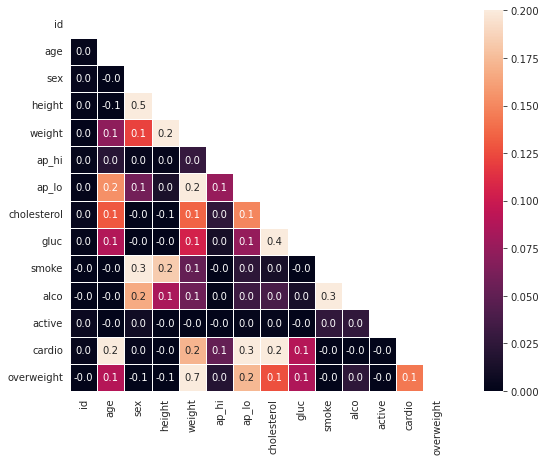

In [22]:
mask = np.triu(Corr)

with sns.axes_style("white"):
    f, fig = plt.subplots(figsize=(12, 7))
    fig = sns.heatmap(Corr,vmin=0,vmax=.2,square=True,annot=True,linewidths=.5,fmt=".1f",mask=mask)
    

In [37]:
# Analysis: As we spect, the most correlated variables are: weight - overweight, gender - smoke, cholesterol - glucosa and gender - height.